# Sentiment Analysis on Covid19 vaccine tweets.



Problem statement: The main idea of this research project is to understand the attitude of a population towards the Covid19 vaccine. Analyzing and comprehending the emotions of the people will help the government in putting an accurate budge for vaccines.

In [1]:
#importing python libraries 
import pandas as pd
import numpy as np
import re #regular expression
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
import string
import datetime
import neattext.functions as nfx
from textblob import TextBlob
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')
%matplotlib inline

# Load Data 
    

A sample of 1000 tweets is extracted from Twitter using tweeepy and Twipper API,following specific words such as 
       covid19vaccine,
       covidvaccine and 
       vaccination.

In [2]:
df = pd.read_csv(r'C:\Users\mokaba\Downloads\vaccination_tweets.csv')

In [3]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
df.tail()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
189049,1435274147353927702,Markets Today,"Tamil Nadu, India",Latest news from Indian Stock markets and Glob...,2012-05-04 13:48:33,9846,57,43331,False,2021-09-07 16:09:57,Dr Reddy's Laboratories said it initiated supp...,NaN,Twitter for Android,0,0,False
189050,1435273895267897344,Rajalingam,India,NaN,2011-08-16 07:39:43,56,73,289,False,2021-09-07 16:08:57,@drreddys Wn will #SputnikV arrive in Assam?? ...,"['SputnikV', 'assamcovidupdate']",Twitter for Android,0,0,False
189051,1435273812572921857,Mint,India,Breaking news and analyses of Indian and world...,2008-11-27 09:07:38,1984949,69,510,True,2021-09-07 16:08:37,Dr Reddy's Laboratories said it initiated supp...,NaN,Twitter Web App,3,10,False
189052,1435266518753824773,LatestLY,"Mumbai, India","https://t.co/UVDtERUJlr focuses on the What, W...",2017-02-07 05:41:28,70920,348,132,True,2021-09-07 15:39:38,COVID-19 Vaccine Update: Dr Reddy's Start Supp...,['COVID19Vaccine'],TweetDeck,0,0,False
189053,1435263139470188545,PINAK SHUKLA🇮🇳,"Ahmadabad City, India","SR. REPORTER, SR.PRODUCER - TV9 - GUJARATI, DE...",2009-10-14 10:30:47,1737,1142,6424,False,2021-09-07 15:26:13,"In India, #SputnikV vaccine is administered in...",['SputnikV'],Twitter for Android,0,0,False


In [5]:
df['user_location'].value_counts()

Bengaluru, India                  12067
India                              6564
Toronto, Canada  and Worldwide     2618
New Delhi, India                   2562
Mumbai, India                      1646
                                  ...  
63 York St. New Haven, CT 0651        1
Linköping, Sweden                     1
mindofmartinez2@gmail.com             1
Rotterdam-Amsterdam-BXL-Ghent         1
Worldwide/ Mobile Japanese            1
Name: user_location, Length: 22754, dtype: int64

In [6]:
df.drop(['id','user_name','user_description','user_followers','user_friends','user_favourites','user_verified','user_created','source','retweets','favorites','is_retweet'],axis=1,inplace=True)

In [7]:
df = df.groupby('user_location')

In [8]:
df = df.get_group('South Africa')

In [9]:
df.head(10)

,user_location,date,text,hashtags
133,South Africa,2020-12-14 12:40:55,vaccinated. More than 1.1 million new cases ha...,NaN
134,South Africa,2020-12-14 12:40:18,US HEALTH CARE WORKERS &amp; MOST VULNERABLE T...,NaN
1109,South Africa,2020-12-25 09:23:08,"Chile's President, @sebastianpinera has descri...",NaN
3721,South Africa,2021-01-17 09:19:48,reports are #PfizerVaccine is no longer safe.....,"['PfizerVaccine', 'PfizerBioNTech', 'PfizerCov..."
3841,South Africa,2021-01-16 07:30:11,"The @HealthZA Deputy DG, Dr Anban Pillay, says...",['COVAX']
5420,South Africa,2021-02-07 09:34:45,World News Headlines Today - 6 Feb 2021 Earth ...,NaN
5678,South Africa,2021-02-07 19:28:20,"By the way, Russia's #SputnikV has over 90% ef...","['SputnikV', 'AstraZeneca']"
5903,South Africa,2021-02-08 07:12:54,@vusiking I have send countless tweets to @Cyr...,NaN
5908,South Africa,2021-02-08 06:29:50,"Buying these expensive vaccines from the West,...",NaN
6129,South Africa,2021-02-08 20:01:55,@businessinsider\nDoes #SputnikV provides prot...,"['SputnikV', 'SouthAfrica']"


In [10]:
df.tail(10)

,user_location,date,text,hashtags
188621,South Africa,2021-09-14 20:06:34,Russia-Putin is quarantining after several #Co...,"['Covid19', 'vaccinated']"
188639,South Africa,2021-09-14 12:32:12,If you don’t go &amp; find the truth like a RE...,NaN
188640,South Africa,2021-09-14 12:31:36,@bonglez @Radio702 If you don’t go &amp; find ...,NaN
188648,South Africa,2021-09-14 10:18:05,@PresidencyZA @DDMabuza @SAHPRA1 @HealthZA giv...,"['Viralvectorvaccines', 'SputnikV', 'Sinovac']"
188722,South Africa,2021-09-13 14:10:24,Why? I wonder🤔@SAHPRA1 @HealthZA supply #Sinov...,"['Sinovac', 'SputnikV', 'Viralvectorvaccines',..."
188723,South Africa,2021-09-13 14:04:09,@thulasindi @therealdineo The question is … WH...,NaN
188897,South Africa,2021-09-10 07:45:51,@miamalan Rubbish and you know it #covid19SA #...,"['covid19SA', 'viralvectorvaccines', 'SputnikV']"
188969,South Africa,2021-09-08 17:34:12,@DDMabuza @PresidencyZA Give us access to ALL ...,"['viralvectorvaccines', 'Sinovac', 'SputnikV']"
189000,South Africa,2021-09-08 09:26:02,With access to ALL vaccines including #viralve...,"['viralvectorvaccines', 'Sinovac', 'SputnikV',..."
189009,South Africa,2021-09-08 07:07:53,@SAHPRA1 just approve #viralvectorvaccines #Sp...,"['viralvectorvaccines', 'SputnikV', 'Sinovac',..."


In [11]:
df.shape

(251, 4)

# Data pre-processing/preparation.

# 1.Text cleaning
 -as we know tweets contain noise, hence it must cleaned and processed before we can perform Sentiment Analysis on them and this is good practice for NLP(Natural language processing).

In [12]:
# tweets processing function
def process_tweet(tweet):
    tweet = tweet.lower()                                             # Lowercases the string
    tweet = re.sub('@[^\s]+', '', tweet)                              # Removes usernames
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   # Remove URLs
    tweet = re.sub(r"\d+", " ", str(tweet))                           # Removes all digits
    tweet = re.sub('&quot;'," ", tweet)                               # Remove (&quot;) 
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   # Removes all single characters
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                       # Removes all punctuations
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         # Convert more than 2 letter repetitions to 2 letter
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space    
    return tweet



In [13]:
#apply the processing fuction on the tweets.
df['clean_text'] = df['text'].apply(process_tweet)
df.head(10)

,user_location,date,text,hashtags,clean_text
133,South Africa,2020-12-14 12:40:55,vaccinated. More than 1.1 million new cases ha...,NaN,vaccinated more than million new cases have be...
134,South Africa,2020-12-14 12:40:18,US HEALTH CARE WORKERS &amp; MOST VULNERABLE T...,NaN,us health care workers amp most vulnerable to ...
1109,South Africa,2020-12-25 09:23:08,"Chile's President, @sebastianpinera has descri...",NaN,chile president has described the start of his...
3721,South Africa,2021-01-17 09:19:48,reports are #PfizerVaccine is no longer safe.....,"['PfizerVaccine', 'PfizerBioNTech', 'PfizerCov...",reports are pfizervaccine is no longer safe pf...
3841,South Africa,2021-01-16 07:30:11,"The @HealthZA Deputy DG, Dr Anban Pillay, says...",['COVAX'],the deputy dg dr anban pillay says they have a...
5420,South Africa,2021-02-07 09:34:45,World News Headlines Today - 6 Feb 2021 Earth ...,NaN,world news headlines today feb earth globe eur...
5678,South Africa,2021-02-07 19:28:20,"By the way, Russia's #SputnikV has over 90% ef...","['SputnikV', 'AstraZeneca']",by the way russia sputnikv has over efficacy t...
5903,South Africa,2021-02-08 07:12:54,@vusiking I have send countless tweets to @Cyr...,NaN,have send countless tweets to and with lots o...
5908,South Africa,2021-02-08 06:29:50,"Buying these expensive vaccines from the West,...",NaN,buying these expensive vaccines from the west ...
6129,South Africa,2021-02-08 20:01:55,@businessinsider\nDoes #SputnikV provides prot...,"['SputnikV', 'SouthAfrica']",does sputnikv provides protection against new...


In [14]:
df['date']=pd.to_datetime(df['date'])


In [15]:
df.head(20)

,user_location,date,text,hashtags,clean_text
133,South Africa,2020-12-14 12:40:55,vaccinated. More than 1.1 million new cases ha...,NaN,vaccinated more than million new cases have be...
134,South Africa,2020-12-14 12:40:18,US HEALTH CARE WORKERS &amp; MOST VULNERABLE T...,NaN,us health care workers amp most vulnerable to ...
1109,South Africa,2020-12-25 09:23:08,"Chile's President, @sebastianpinera has descri...",NaN,chile president has described the start of his...
3721,South Africa,2021-01-17 09:19:48,reports are #PfizerVaccine is no longer safe.....,"['PfizerVaccine', 'PfizerBioNTech', 'PfizerCov...",reports are pfizervaccine is no longer safe pf...
3841,South Africa,2021-01-16 07:30:11,"The @HealthZA Deputy DG, Dr Anban Pillay, says...",['COVAX'],the deputy dg dr anban pillay says they have a...
5420,South Africa,2021-02-07 09:34:45,World News Headlines Today - 6 Feb 2021 Earth ...,NaN,world news headlines today feb earth globe eur...
5678,South Africa,2021-02-07 19:28:20,"By the way, Russia's #SputnikV has over 90% ef...","['SputnikV', 'AstraZeneca']",by the way russia sputnikv has over efficacy t...
5903,South Africa,2021-02-08 07:12:54,@vusiking I have send countless tweets to @Cyr...,NaN,have send countless tweets to and with lots o...
5908,South Africa,2021-02-08 06:29:50,"Buying these expensive vaccines from the West,...",NaN,buying these expensive vaccines from the west ...
6129,South Africa,2021-02-08 20:01:55,@businessinsider\nDoes #SputnikV provides prot...,"['SputnikV', 'SouthAfrica']",does sputnikv provides protection against new...


In [16]:
#find patterns with a sentences function
def remove_pattern(text,pattern):
    r = re.findall(pattern,text)
    for i in r:
        text = re.sub(i, '', text)
    return text

In [17]:
#removes @mentions
df['clean_text'] = np.vectorize(remove_pattern)(df['clean_text'], "@[\w]*")
df[['text','clean_text']]

,text,clean_text
133,vaccinated. More than 1.1 million new cases ha...,vaccinated more than million new cases have be...
134,US HEALTH CARE WORKERS &amp; MOST VULNERABLE T...,us health care workers amp most vulnerable to ...
1109,"Chile's President, @sebastianpinera has descri...",chile president has described the start of his...
3721,reports are #PfizerVaccine is no longer safe.....,reports are pfizervaccine is no longer safe pf...
3841,"The @HealthZA Deputy DG, Dr Anban Pillay, says...",the deputy dg dr anban pillay says they have a...
...,...,...
188723,@thulasindi @therealdineo The question is … WH...,the question is why why is the vaccination ce...
188897,@miamalan Rubbish and you know it #covid19SA #...,rubbish and you know it covid sa viralvectorv...
188969,@DDMabuza @PresidencyZA Give us access to ALL ...,give us access to all vaccines including vira...
189000,With access to ALL vaccines including #viralve...,with access to all vaccines including viralvec...


In [18]:
#checking the 4th tweet after cleaning.
df['clean_text'].iloc[5]

'world news headlines today feb earth globe europe africa mayanmar coup navalny in court israel war cri '

In [19]:
# remove special characters, numbers, punctuations
df['clean_text']= df['clean_text'].str.replace("[^a-zA-Z#]", " ")
df['clean_text']

133       vaccinated more than million new cases have be...
134       us health care workers amp most vulnerable to ...
1109      chile president has described the start of his...
3721      reports are pfizervaccine is no longer safe pf...
3841      the deputy dg dr anban pillay says they have a...
                                ...                        
188723     the question is why why is the vaccination ce...
188897     rubbish and you know it covid sa viralvectorv...
188969     give us access to all vaccines including vira...
189000    with access to all vaccines including viralvec...
189009     just approve viralvectorvaccines sputnikv sin...
Name: clean_text, Length: 251, dtype: object

In [20]:
#removing short words
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


In [21]:
df = df.drop_duplicates('text')             #dropping duplicate tweets
df.shape

#display the tweets
df.head()

,user_location,date,text,hashtags,clean_text
133,South Africa,2020-12-14 12:40:55,vaccinated. More than 1.1 million new cases ha...,NaN,vaccinated more than million cases have been c...
134,South Africa,2020-12-14 12:40:18,US HEALTH CARE WORKERS &amp; MOST VULNERABLE T...,NaN,health care workers most vulnerable receive pf...
1109,South Africa,2020-12-25 09:23:08,"Chile's President, @sebastianpinera has descri...",NaN,chile president described start country nation...
3721,South Africa,2021-01-17 09:19:48,reports are #PfizerVaccine is no longer safe.....,"['PfizerVaccine', 'PfizerBioNTech', 'PfizerCov...",reports pfizervaccine longer safe pfizerbionte...
3841,South Africa,2021-01-16 07:30:11,"The @HealthZA Deputy DG, Dr Anban Pillay, says...",['COVAX'],deputy anban pillay says they have applied cov...


In [22]:
df.sort_values(by=['date'], ascending=[True]).head(2)

,user_location,date,text,hashtags,clean_text
134,South Africa,2020-12-14 12:40:18,US HEALTH CARE WORKERS &amp; MOST VULNERABLE T...,NaN,health care workers most vulnerable receive pf...
133,South Africa,2020-12-14 12:40:55,vaccinated. More than 1.1 million new cases ha...,NaN,vaccinated more than million cases have been c...


In [23]:
#find the polarity and subjectivity of the tweets sentences
df['Polarity'] = df['clean_text'].apply(lambda x:TextBlob(x).sentiment.polarity)
df['Subjectivity'] = df['clean_text'].apply(lambda x:TextBlob(x).sentiment.subjectivity)
df.head(10)

,user_location,date,text,hashtags,clean_text,Polarity,Subjectivity
133,South Africa,2020-12-14 12:40:55,vaccinated. More than 1.1 million new cases ha...,NaN,vaccinated more than million cases have been c...,0.162500,0.462500
134,South Africa,2020-12-14 12:40:18,US HEALTH CARE WORKERS &amp; MOST VULNERABLE T...,NaN,health care workers most vulnerable receive pf...,0.000000,0.500000
1109,South Africa,2020-12-25 09:23:08,"Chile's President, @sebastianpinera has descri...",NaN,chile president described start country nation...,0.000000,0.000000
3721,South Africa,2021-01-17 09:19:48,reports are #PfizerVaccine is no longer safe.....,"['PfizerVaccine', 'PfizerBioNTech', 'PfizerCov...",reports pfizervaccine longer safe pfizerbionte...,0.500000,0.500000
3841,South Africa,2021-01-16 07:30:11,"The @HealthZA Deputy DG, Dr Anban Pillay, says...",['COVAX'],deputy anban pillay says they have applied cov...,0.000000,0.533333
5420,South Africa,2021-02-07 09:34:45,World News Headlines Today - 6 Feb 2021 Earth ...,NaN,world news headlines today earth globe europe ...,0.000000,0.000000
5678,South Africa,2021-02-07 19:28:20,"By the way, Russia's #SputnikV has over 90% ef...","['SputnikV', 'AstraZeneca']",russia sputnikv over efficacy astrazeneca whic...,0.000000,0.000000
5903,South Africa,2021-02-08 07:12:54,@vusiking I have send countless tweets to @Cyr...,NaN,have send countless tweets with lots positive ...,0.113636,0.522727
5908,South Africa,2021-02-08 06:29:50,"Buying these expensive vaccines from the West,...",NaN,buying these expensive vaccines from west when...,-0.500000,0.700000
6129,South Africa,2021-02-08 20:01:55,@businessinsider\nDoes #SputnikV provides prot...,"['SputnikV', 'SouthAfrica']",does sputnikv provides protection against sout...,0.200000,0.100000


In [24]:
#determine the sentiment
def getAnalysis(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'    

In [25]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)   

In [26]:
df.head()

,user_location,date,text,hashtags,clean_text,Polarity,Subjectivity,Analysis
133,South Africa,2020-12-14 12:40:55,vaccinated. More than 1.1 million new cases ha...,NaN,vaccinated more than million cases have been c...,0.1625,0.462500,Positive
134,South Africa,2020-12-14 12:40:18,US HEALTH CARE WORKERS &amp; MOST VULNERABLE T...,NaN,health care workers most vulnerable receive pf...,0.0000,0.500000,Neutral
1109,South Africa,2020-12-25 09:23:08,"Chile's President, @sebastianpinera has descri...",NaN,chile president described start country nation...,0.0000,0.000000,Neutral
3721,South Africa,2021-01-17 09:19:48,reports are #PfizerVaccine is no longer safe.....,"['PfizerVaccine', 'PfizerBioNTech', 'PfizerCov...",reports pfizervaccine longer safe pfizerbionte...,0.5000,0.500000,Positive
3841,South Africa,2021-01-16 07:30:11,"The @HealthZA Deputy DG, Dr Anban Pillay, says...",['COVAX'],deputy anban pillay says they have applied cov...,0.0000,0.533333,Neutral


In [27]:
df['Analysis'].value_counts()

Neutral     152
Positive     75
Negative     24
Name: Analysis, dtype: int64

In [28]:
df['clean_text'].iloc[5]

'world news headlines today earth globe europe africa mayanmar coup navalny court israel'

# 2.Tokenization
    -sentences are split into words 

# 3.Lemmatization and Stemming
    -the tokenized words are then converted to their root level 
    for example words such as ran,running share a root word run
    ,this will help us identify frequently used words

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mokaba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [31]:
#tokenizing the tweets
tokenized_tweet = df['clean_text'].apply(lambda x: x.split())
tokenized_tweet.head(10)


133     [vaccinated, more, than, million, cases, have,...
134     [health, care, workers, most, vulnerable, rece...
1109    [chile, president, described, start, country, ...
3721    [reports, pfizervaccine, longer, safe, pfizerb...
3841    [deputy, anban, pillay, says, they, have, appl...
5420    [world, news, headlines, today, earth, globe, ...
5678    [russia, sputnikv, over, efficacy, astrazeneca...
5903    [have, send, countless, tweets, with, lots, po...
5908    [buying, these, expensive, vaccines, from, wes...
6129    [does, sputnikv, provides, protection, against...
Name: clean_text, dtype: object

In [32]:
from nltk.stem.wordnet import WordNetLemmatizer
wordnet = WordNetLemmatizer()


print('WordNet Lemmatizer')
print(wordnet.lemmatize('trouble'))
print(wordnet.lemmatize('troubled'))
print(wordnet.lemmatize('troubling'))

WordNet Lemmatizer
trouble
troubled
troubling


In [33]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [wordnet.lemmatize(i) for i in x]) #lemmatizing
tokenized_tweet.head(10)


133     [vaccinated, more, than, million, case, have, ...
134     [health, care, worker, most, vulnerable, recei...
1109    [chile, president, described, start, country, ...
3721    [report, pfizervaccine, longer, safe, pfizerbi...
3841    [deputy, anban, pillay, say, they, have, appli...
5420    [world, news, headline, today, earth, globe, e...
5678    [russia, sputnikv, over, efficacy, astrazeneca...
5903    [have, send, countless, tweet, with, lot, posi...
5908    [buying, these, expensive, vaccine, from, west...
6129    [doe, sputnikv, provides, protection, against,...
Name: clean_text, dtype: object

In [34]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

print('PorterStemmer')
print(stemmer.stem('trouble'))
print(stemmer.stem('troubling'))
print(stemmer.stem('troubled'))


PorterStemmer
troubl
troubl
troubl


In [35]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head(10)

133     [vaccin, more, than, million, case, have, been...
134     [health, care, worker, most, vulner, receiv, p...
1109    [chile, presid, describ, start, countri, natio...
3721    [report, pfizervaccin, longer, safe, pfizerbio...
3841    [deputi, anban, pillay, say, they, have, appli...
5420    [world, news, headlin, today, earth, globe, eu...
5678    [russia, sputnikv, over, efficaci, astrazeneca...
5903    [have, send, countless, tweet, with, lot, posi...
5908    [buy, these, expens, vaccin, from, west, when,...
6129    [doe, sputnikv, provid, protect, against, sout...
Name: clean_text, dtype: object

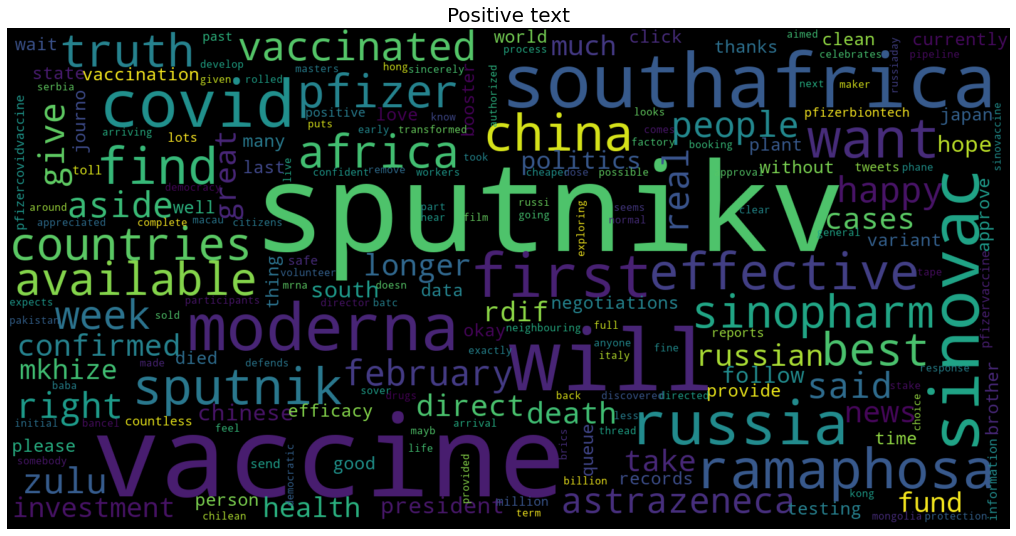

In [36]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(text for text in df.loc[df['Analysis']=='Positive','clean_text'])
stopwords = set(STOPWORDS)
stopwords.update(["t", "co", "https", "amp", "U"])
wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
fig = plt.figure(1, figsize=(16,16))
plt.axis('off')
plt.title('Positive text',fontsize=20)
#fig.subplots_adjust(top=2.3)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

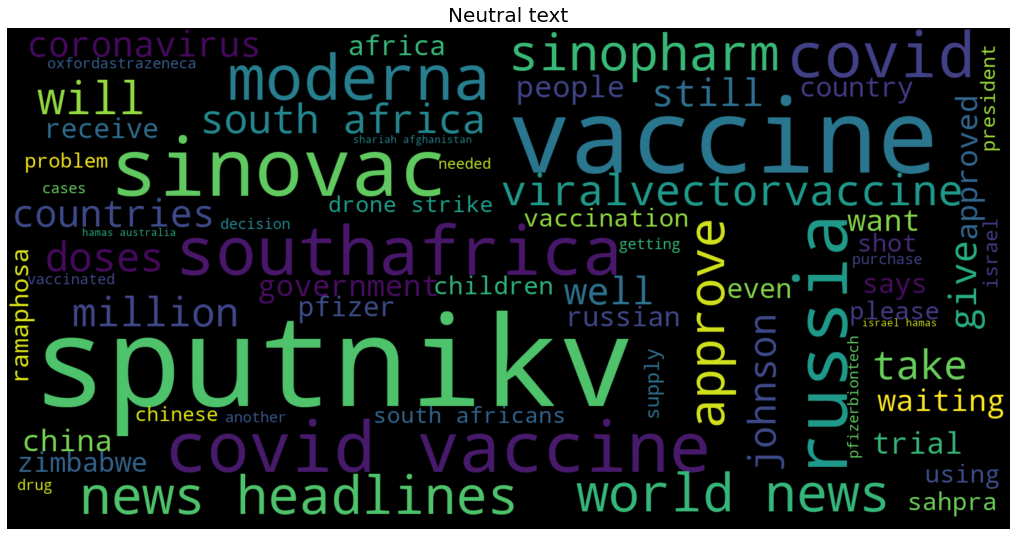

In [37]:
text = " ".join(text for text in df.loc[df['Analysis']=='Neutral','clean_text'])
stopwords = set(STOPWORDS)
stopwords.update(["t", "co", "https", "amp", "U"])
wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
fig = plt.figure(1, figsize=(16,16))
plt.axis('off')
plt.title('Neutral text',fontsize=20)
#fig.subplots_adjust(top=2.3)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

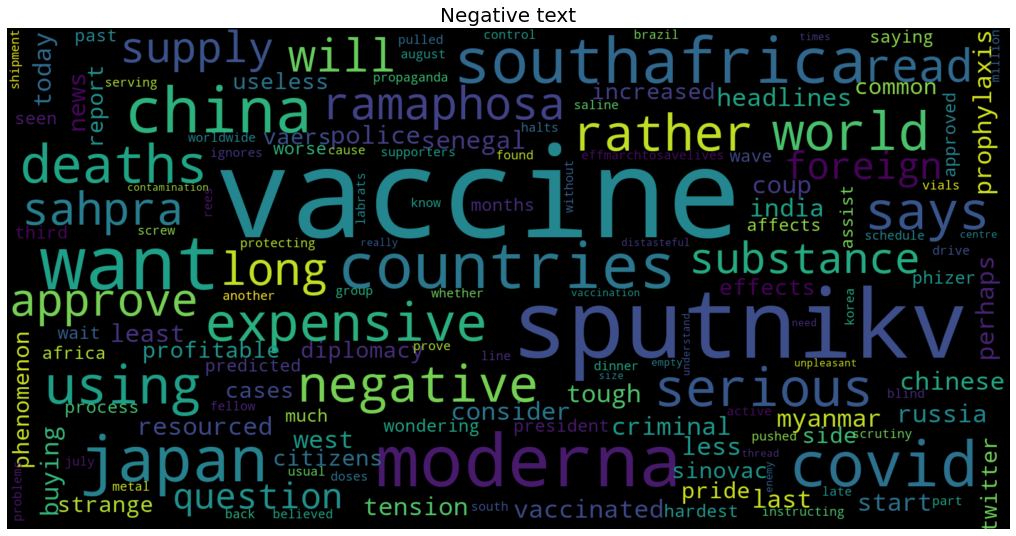

In [38]:
text = " ".join(text for text in df.loc[df['Analysis']=='Negative','clean_text'])
stopwords = set(STOPWORDS)
stopwords.update(["t", "co", "https", "amp", "U"])
wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
fig = plt.figure(1, figsize=(16,16))
plt.axis('off')
plt.title('Negative text',fontsize=20)
#fig.subplots_adjust(top=2.3)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

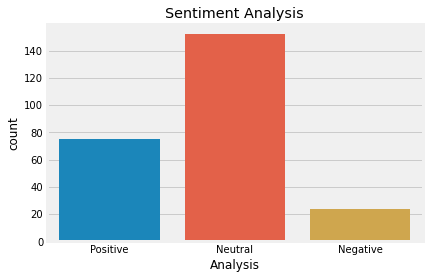

In [39]:
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
sns.countplot(df['Analysis'])
#df['Sentiment'].value_counts().plot(kind='bar')
plt.show()


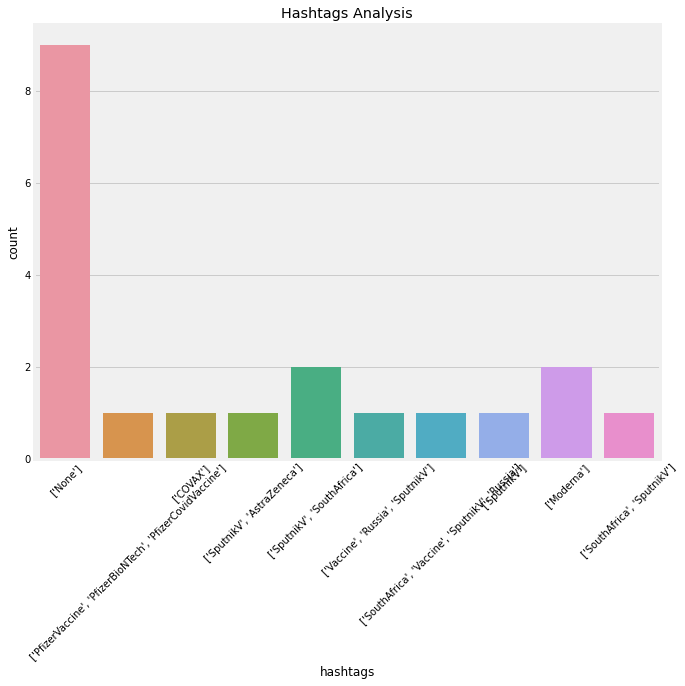

In [82]:
df['hashtags'].value_counts()
plt.figure(figsize=(10,8))
plt.title('Hashtags Analysis')
plt.xlabel('Hashtags')
plt.ylabel('Counts')
plt.xticks(rotation=45)
sns.countplot(df['hashtags'][:20])
#df['Sentiment'].value_counts().plot(kind='bar')
plt.show()


In [88]:
df['hashtags'] = df['hashtags'].replace(np.nan,'')
df['hashtags'].values.tolist


<function ndarray.tolist>

In [63]:
df['datedt'] = pd.to_datetime(df['date'])
df['year'] = df['datedt'].dt.year
df['month'] = df['datedt'].dt.month
df['day'] = df['datedt'].dt.day
df['dayofweek'] = df['datedt'].dt.dayofweek
df['hour'] = df['datedt'].dt.hour
df['minute'] = df['datedt'].dt.minute
df['dayofyear'] = df['datedt'].dt.dayofyear
df['date_only'] = df['datedt'].dt.date

In [41]:
tweets_df = df.groupby(["date_only"])["text"].count().reset_index()
tweets_df.columns = ["date_only", "count"]

In [42]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

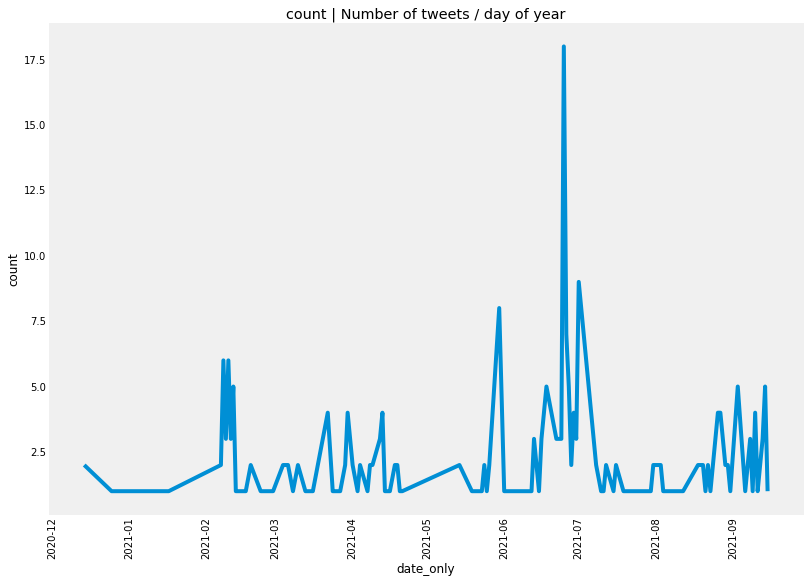

In [43]:
plot_time_variation(tweets_df, title="Number of tweets / day of year",size=3)

# 4.Feature Extraction(vectorization).
    -Tf-idf is different from CountVectorizer. CountVectorizer gives equal weightage to all the words, i.e. a word is converted to a column (in a dataframe for example) and for each document, it is equal to 1 if it is present in that doc else 0. Apart from giving this information, Tf-idf says how important that word is to that document with respect to the corpus.



# Count vectorizer
As we all know, all machine learning algorithms are good with numbers; we have to extract or convert the text data into numbers without losing much of the information. One way to do such transformation is Bag-Of-Words (BOW) which gives a number to each word but that is very inefficient. So, a way to do it is by CountVectorizer: it counts the number of words in the document i.e it converts a collection of text documents to a matrix of the counts of occurences of each word in the document.

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2))    # Unigram and Bigram
final_vectorized_data = count_vectorizer.fit_transform(df['clean_text'])  
final_vectorized_data


<251x2483 sparse matrix of type '<class 'numpy.int64'>'
	with 4016 stored elements in Compressed Sparse Row format>

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['clean_text'])


# Tf-Idf vectorizer
TF-IDF (stands for Term-Frequency-Inverse-Document Frequency) weights down the common words occuring in almost all the documents and give more importance to the words that appear in a subset of documents. TF-IDF works by penalising these common words by assigning them lower weights while giving importance to some rare words in a particular document. Rare terms are more informative than frequent terms.






The below code is commented out because CountVectorizer gives better accuracy in this sentiment analysis than tf-idf. If you want to check, then uncomment the code below, comment the countVectorizer code above and run the whole code again.




In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

#  Building the model

# Multinomial Naive Bayes 



Splitting train data to test accuracy

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, df['Analysis'],
                                                    test_size=0.2, random_state=69)


In [48]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)


X_train_shape :  (200, 2483)
X_test_shape :  (51, 2483)
y_train_shape :  (200,)
y_test_shape :  (51,)


# Naive_bayes
Bayes theorem :
Naive_bayes
Bayes theorem :¶


There are some popular classifiers under Naive Bayes
Bernoulli Naive Bayes
Gaussian Naive Bayes classifier
Multinomial Naive Bayes
We will use Multinomial Naive Bayes classifier
I

In [49]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

# Find out accuracy of our prediction


In [50]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)


Accuracy with Naive-bayes:  0.5882352941176471


#  Precision, Recall, and Accuracy
Precision, recall, and accuracy are standard metrics used to evaluate the performance of a classifier.
Precision measures how many texts were predicted correctly as belonging to a given category out of all of the texts that were predicted (correctly and incorrectly) as belonging to the category.

Recall measures how many texts were predicted correctly as belonging to a given category out of all the texts that should have been predicted as belonging to the category. We also know that the more data we feed our classifiers with, the better recall will be.

Accuracy measures how many texts were predicted correctly (both as belonging to a category and not belonging to the category) out of all of the texts in the corpus.



In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_naive))


              precision    recall  f1-score   support

    Negative       0.11      0.20      0.14         5
     Neutral       0.74      0.65      0.69        31
    Positive       0.60      0.60      0.60        15

    accuracy                           0.59        51
   macro avg       0.48      0.48      0.48        51
weighted avg       0.64      0.59      0.61        51

